<a href="https://colab.research.google.com/github/cvillarr123/trading/blob/master/notebook/balance_v001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/chrisconlan/algorithmic-trading-with-python.git


Cloning into 'algorithmic-trading-with-python'...
remote: Enumerating objects: 341, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 341 (delta 44), reused 312 (delta 24), pack-reused 0
Receiving objects: 100% (341/341), 4.83 MiB | 15.22 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [10]:
!pip install alpha_vantage

     |████████████████████████████████| 1.3MB 13.5MB/s 
     |████████████████████████████████| 296kB 32.8MB/s 
     |████████████████████████████████| 143kB 43.4MB/s 


In [11]:
!pip install alpha_vantage pandas

In [3]:
%cd algorithmic-trading-with-python/src/

/content/algorithmic-trading-with-python/src


In [4]:
!ls

bootstrap_portfolio.py	       pypm
fit_alternative_data_model.py  simulate_alternative_data_portfolio.py
__init__.py		       simulate_portfolio.py
optimize_portfolio.py	       white_noise_portfolio.py


In [5]:
import sys
sys.path.insert(0, '/content/algorithmic-trading-with-python/src/pypm')

In [8]:
import pypm
from pypm import metrics
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

metrics.calculate_calmar_ratio

<function pypm.metrics.calculate_calmar_ratio>

In [14]:

# **Ver el precio de intercambio al cierre**

from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key='1035HSNE5D7XWHLM',output_format='pandas')

# There is no metadata in this call
data_exchange_rate, meta_exchange_rate = cc.get_currency_exchange_rate(from_currency='GBP',to_currency='AUD')

#data_exchange_rate.head(5)




,1. open,2. high,3. low,4. close
date,,,,
2021-06-18 21:30:00,1.84489,1.84489,1.84489,1.84489
2021-06-18 21:15:00,1.84489,1.84489,1.84489,1.84489
2021-06-18 21:00:00,1.84421,1.84589,1.84334,1.84574
2021-06-18 20:45:00,1.84399,1.84464,1.84353,1.84414
2021-06-18 20:30:00,1.84389,1.84423,1.84313,1.84393


In [15]:
# para analisis diario
data_daily, meta_daily = cc.get_currency_exchange_daily ('GBP','AUD',outputsize='compact')


#data_daily.head(5)


In [ ]:

# para analisis mensual

data_monthly, meta_monthly = cc.get_currency_exchange_monthly('GBP','AUD',outputsize='compact')

#data_monthly.head(5)



In [17]:

# Ver el intraday para el calculo de banderas

data_intraday, meta_intraday = cc.get_currency_exchange_intraday('GBP','AUD',interval='15min',outputsize='full')

data_intraday.head(5)

,1. open,2. high,3. low,4. close
date,,,,
2021-06-18 21:30:00,1.84489,1.84489,1.84489,1.84489
2021-06-18 21:15:00,1.84489,1.84489,1.84489,1.84489
2021-06-18 21:00:00,1.84421,1.84589,1.84334,1.84574
2021-06-18 20:45:00,1.84399,1.84464,1.84353,1.84414
2021-06-18 20:30:00,1.84389,1.84423,1.84313,1.84393


In [ ]:
columns = ['open','high','low','close']
data_intraday.columns = columns

In [24]:
data_intraday['TradeDate'] = data_intraday.index.date 
data_intraday['time'] = data_intraday.index.time

In [25]:
data_intraday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980 entries, 2021-06-18 21:30:00 to 2021-06-04 16:15:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       980 non-null    float64
 1   high       980 non-null    float64
 2   low        980 non-null    float64
 3   close      980 non-null    float64
 4   TradeDate  980 non-null    object 
 5   time       980 non-null    object 
dtypes: float64(4), object(2)
memory usage: 53.6+ KB


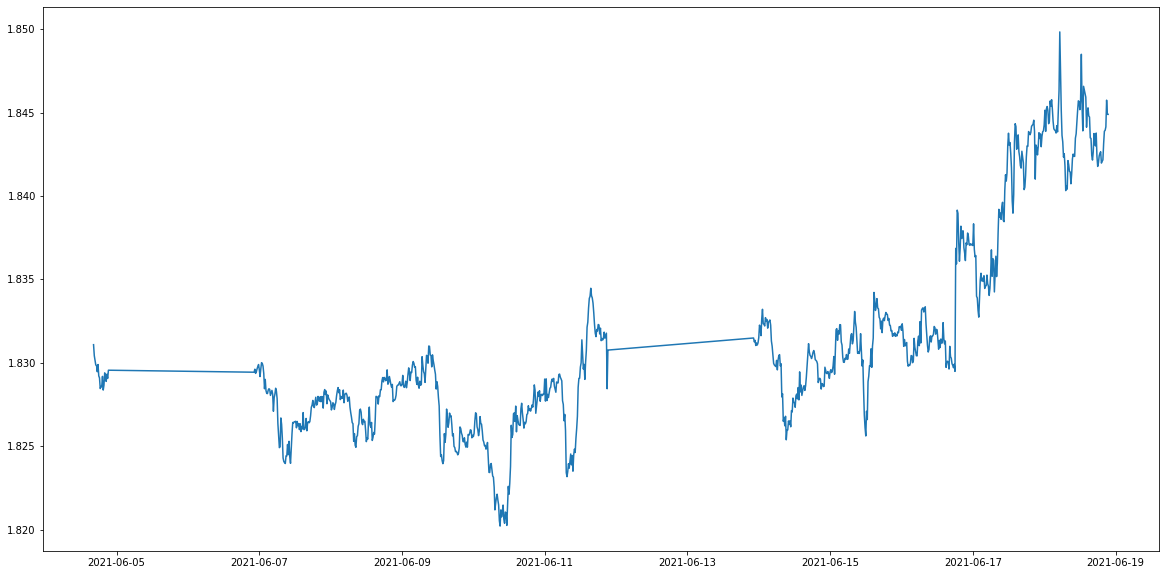

In [26]:
plt.plot(data_intraday["close"])

In [27]:
data_intraday.loc['2021-06-18']

,open,high,low,close,TradeDate,time
date,,,,,,
2021-06-18 21:30:00,1.84489,1.84489,1.84489,1.84489,2021-06-18,21:30:00
2021-06-18 21:15:00,1.84489,1.84489,1.84489,1.84489,2021-06-18,21:15:00
2021-06-18 21:00:00,1.84421,1.84589,1.84334,1.84574,2021-06-18,21:00:00
2021-06-18 20:45:00,1.84399,1.84464,1.84353,1.84414,2021-06-18,20:45:00
2021-06-18 20:30:00,1.84389,1.84423,1.84313,1.84393,2021-06-18,20:30:00
2021-06-18 20:15:00,1.84313,1.84389,1.84254,1.84388,2021-06-18,20:15:00
2021-06-18 20:00:00,1.84219,1.84325,1.84181,1.84314,2021-06-18,20:00:00
2021-06-18 19:45:00,1.84207,1.84291,1.84160,1.84216,2021-06-18,19:45:00
2021-06-18 19:30:00,1.84200,1.84231,1.84113,1.84208,2021-06-18,19:30:00


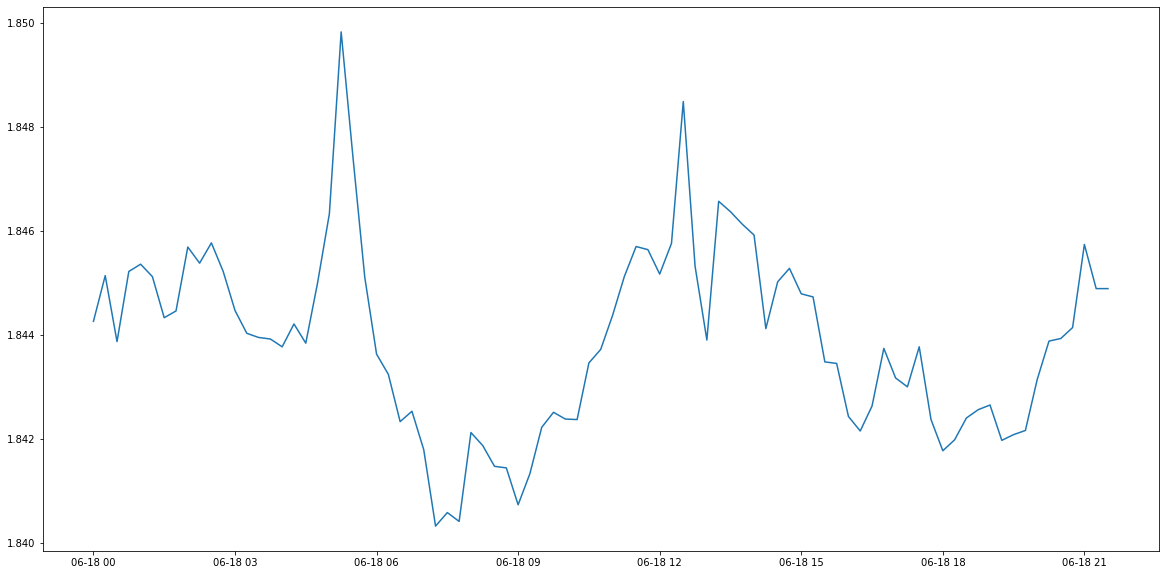

In [28]:
plt.plot(data_intraday.loc['2021-06-18']["close"])